# **Hotel Booking Demand**
---
**Author: Rizan Pradiya, Gabriella Davintia**

Model prediksi Machine Learning menggunakan sumber data [Hotel Booking Demand](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data).

## **1. Business Problem Understanding**

### 1.1 Context

Industri perhotelan merupakan salah satu sektor penting dalam pariwisata yang menyediakan layanan akomodasi bagi wisatawan. Tingginya mobilitas masyarakat serta meningkatnya jumlah perjalanan bisnis dan wisata membuat pengelolaan pemesanan hotel menjadi semakin kompleks. Oleh karena itu, menarik untuk mengkaji pola pemesanan hotel yang dipengaruhi oleh berbagai faktor operasional dan perilaku tamu.

### 1.2 Problem Statement

Hotel, baik city hotel maupun resort hotel, menghadapi tantangan dalam mengelola pemesanan kamar akibat tingginya tingkat pembatalan dan fluktuasi permintaan. Pola pemesanan dipengaruhi oleh berbagai faktor, seperti waktu pemesanan, durasi menginap, jumlah tamu, jenis hotel, serta permintaan khusus dari tamu. Dalam praktiknya, pihak hotel sering mengalami kesulitan dalam memprediksi apakah suatu pemesanan akan dibatalkan atau tidak. Tingginya pembatalan dapat menyebabkan ketidakefisienan operasional dan potensi kehilangan pendapatan.

### 1.3 Goals

- Menganalisis faktor-faktor utama yang memengaruhi perilaku pemesanan dan pembatalan hotel menggunakan data historis.

Membangun model machine learning berbasis klasifikasi untuk memprediksi kemungkinan pembatalan pemesanan hotel.

Membantu pihak hotel dalam mengoptimalkan pengelolaan reservasi, tingkat hunian, dan strategi harga berdasarkan prediksi berbasis data.

### 1.4 Analytical Approach
1. Data Understanding

Menggunakan data historis pemesanan hotel yang mencakup status pembatalan sebagai variabel target serta berbagai fitur seperti waktu pemesanan, durasi menginap, jumlah tamu, jenis hotel, dan permintaan khusus.

2. Exploratory Data Analysis (EDA)

Menganalisis distribusi data, pola pembatalan, serta hubungan antara fitur-fitur dengan status pembatalan untuk mengidentifikasi faktor yang paling berpengaruh.

3. Data Preprocessing

Melakukan pembagian data menjadi data latih dan data uji, menangani missing values, melakukan encoding pada variabel kategorikal, serta scaling fitur numerik jika diperlukan.

4. Model Development

Membangun dan membandingkan beberapa model klasifikasi seperti Logistic Regression, Decision Tree, Random Forest, dan Gradient Boosting sebagai baseline model.

5. Model Training and Validation

Melatih model menggunakan data latih dan melakukan validasi menggunakan data uji atau cross-validation untuk memastikan kemampuan generalisasi model.

6. Model Selection and Optimization

Melakukan evaluasi performa model, tuning hyperparameter, dan memilih model terbaik berdasarkan metrik evaluasi yang telah ditentukan.

7. Model Interpretation

Menginterpretasikan fitur-fitur yang paling berpengaruh terhadap prediksi pembatalan pemesanan hotel.

### 1.5 Metric Evaluation

Karena menggunakan model klasifikasi, metrik evaluasi yang digunakan adalah:

- ROC-AUC
Digunakan untuk mengukur kemampuan model dalam membedakan antara pemesanan yang dibatalkan dan tidak dibatalkan. Nilai yang semakin mendekati 1 menunjukkan performa model yang semakin baik.

- Recall (%)
Mengukur kemampuan model dalam mendeteksi pemesanan yang benar-benar dibatalkan. Recall yang tinggi penting untuk meminimalkan risiko kamar kosong akibat pembatalan yang tidak terdeteksi.

- Precision (%)
Mengukur ketepatan model dalam memprediksi pembatalan. Precision yang tinggi menunjukkan bahwa sebagian besar prediksi pembatalan memang benar terjadi.

- Confusion Matrix
Digunakan untuk melihat distribusi hasil prediksi model secara detail, yaitu:

    - TP (True Positive): Pembatalan yang berhasil terdeteksi dengan benar.

    - FN (False Negative): Pembatalan yang tidak terdeteksi sehingga berpotensi menyebabkan kamar kosong.

    - FP (False Positive): Pemesanan yang diprediksi batal namun sebenarnya tidak dibatalkan.

- Evaluasi Finansial
Selain metrik statistik, evaluasi juga dilakukan dari sisi bisnis, yaitu:

    - Penghematan (Savings) dalam USD ($): Estimasi potensi kerugian yang dapat diminimalkan melalui prediksi pembatalan.

    - Return on Investment (ROI %): Mengukur efektivitas implementasi model terhadap peningkatan efisiensi dan pendapatan hotel.

### 1.6 Stakeholder
Pemangku kepentingan yang terlibat dalam hasil prediksi pemesanan hotel antara lain:

Manajemen Hotel
Revenue Management Team
Operational & Front Office Team

### 1.7 5-Point Business ML Goals

- Problem: Tingginya tingkat pembatalan dan ketidakpastian permintaan hotel berdampak pada efisiensi operasional dan pendapatan.
- Data: Data historis pemesanan hotel yang mencakup informasi pemesanan, tamu, dan status pembatalan.
- ML Objective: Membangun model klasifikasi untuk memprediksi kemungkinan pembatalan pemesanan hotel.
- Action: Menggunakan hasil prediksi sebagai dasar pengambilan keputusan dalam pengelolaan reservasi dan strategi harga.
- Value: Mengurangi potensi kehilangan pendapatan, meningkatkan tingkat hunian, dan mengoptimalkan operasional hotel.

In [165]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys

In [166]:
df = pd.read_csv("hotel_bookings.csv")

In [167]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [169]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


- cek missing value

In [170]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

- handling missing value

In [171]:
df['children'] = df['children'].fillna(0)

karena missing value pada kolom `children` sedikit maka akan diisi dengan nilai 0 (asumsi tidak ada anak)

In [172]:
categorical = ['country', 'agent', 'company']
df[categorical] = df[categorical].fillna('Unknown')

In [173]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [174]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

## EDA

Jumlah booking berdasarkan tipe

In [175]:
df.groupby('hotel')['is_canceled'].count().reset_index()

,hotel,is_canceled
0,City Hotel,79330
1,Resort Hotel,40060


Persentase cancellation rate

In [176]:
df.groupby('hotel')['is_canceled'].mean() * 100

hotel
City Hotel      41.726963
Resort Hotel    27.763355
Name: is_canceled, dtype: float64

Rata2 harga kamar berdasarkan tipe

In [177]:
df.groupby('hotel')['adr'].mean().reset_index()

,hotel,adr
0,City Hotel,105.304465
1,Resort Hotel,94.952930


Jumlah booking per tahun

In [178]:
df.groupby('arrival_date_year')['hotel'].count().reset_index()

,arrival_date_year,hotel
0,2015,21996
1,2016,56707
2,2017,40687


Jumlah booking per bulan

In [179]:
df.groupby('arrival_date_month')['hotel'].count().reset_index()

,arrival_date_month,hotel
0,April,11089
1,August,13877
2,December,6780
3,February,8068
4,January,5929
5,July,12661
6,June,10939
7,March,9794
8,May,11791
9,November,6794


Jumlah special request setiap tipe hotel

In [180]:
df.groupby('hotel')['total_of_special_requests'].sum().reset_index()

,hotel,total_of_special_requests
0,City Hotel,43387
1,Resort Hotel,24828


### Distribusi data

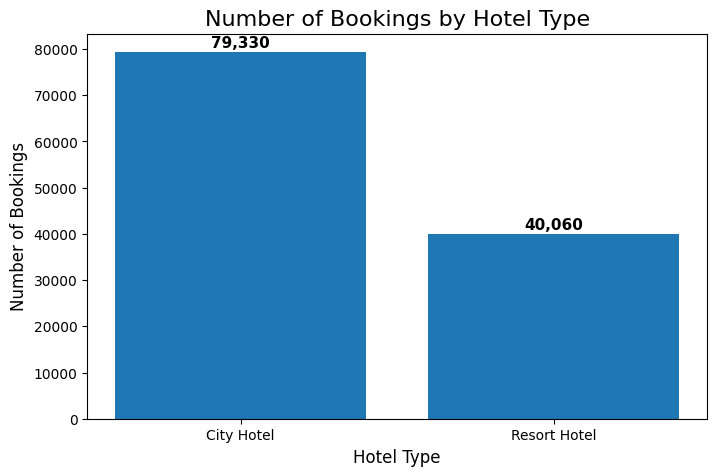

In [181]:
hotel_counts = df['hotel'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(hotel_counts.index, hotel_counts.values)
plt.title("Number of Bookings by Hotel Type", fontsize=16)
plt.xlabel("Hotel Type", fontsize=12)
plt.ylabel("Number of Bookings", fontsize=12)

for i, v in enumerate(hotel_counts.values):
    plt.text(i, v + 1000, f'{v:,}', ha='center', fontsize=11, fontweight='bold')
plt.show()

**Fitur Target**

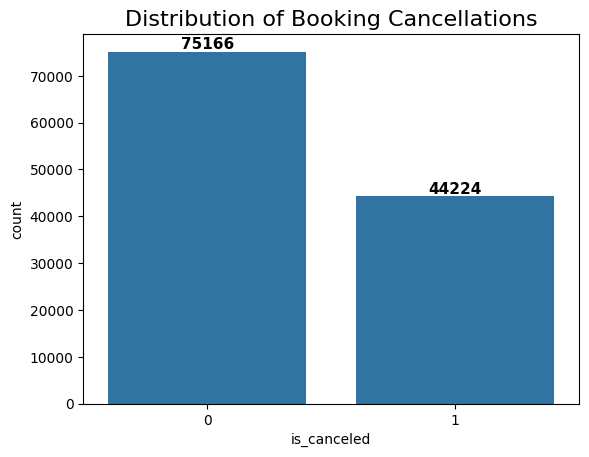

In [182]:
ax = sns.countplot(data=df, x='is_canceled')
plt.title('Distribution of Booking Cancellations', fontsize=16)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=11, fontweight='bold')
plt.show()

0 = No
1 = Yes

**Fitur Numerikal**

- Average Daily Rate (ADR)

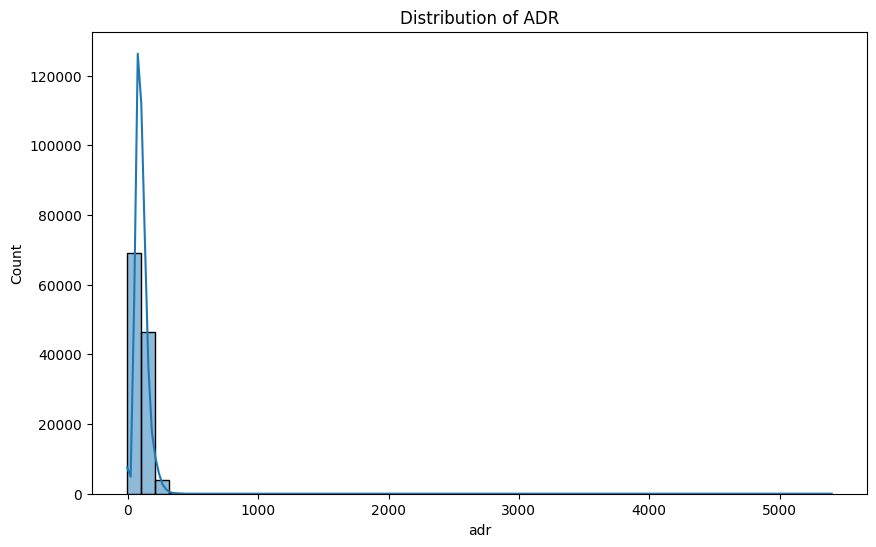

In [183]:
plt.figure(figsize=(10,6))
sns.histplot(df['adr'], bins=50, kde=True)
plt.title('Distribution of ADR')
plt.show()

- Lead Time

Text(0.5, 1.0, 'Distribution of Lead Time')

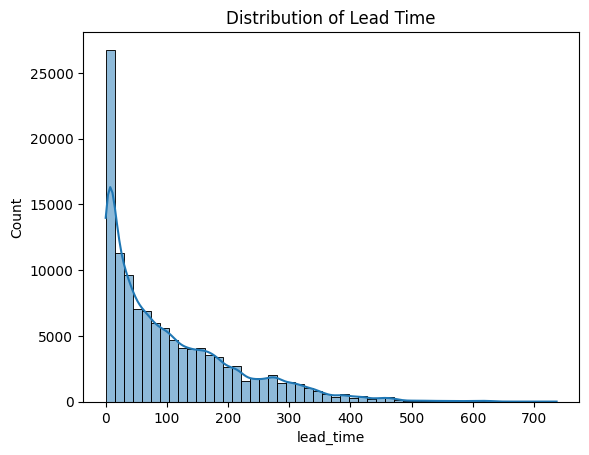

In [184]:
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title('Distribution of Lead Time')

- Stays (Weekend + Weeknights)

<Axes: xlabel='total_stays', ylabel='Count'>

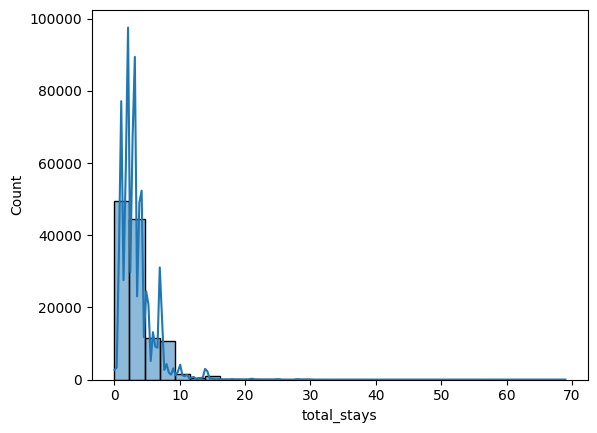

In [185]:
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
sns.histplot(df['total_stays'], bins=30, kde=True)

- Previous Cancellations & Bookings

<Axes: xlabel='previous_bookings_not_canceled', ylabel='Count'>

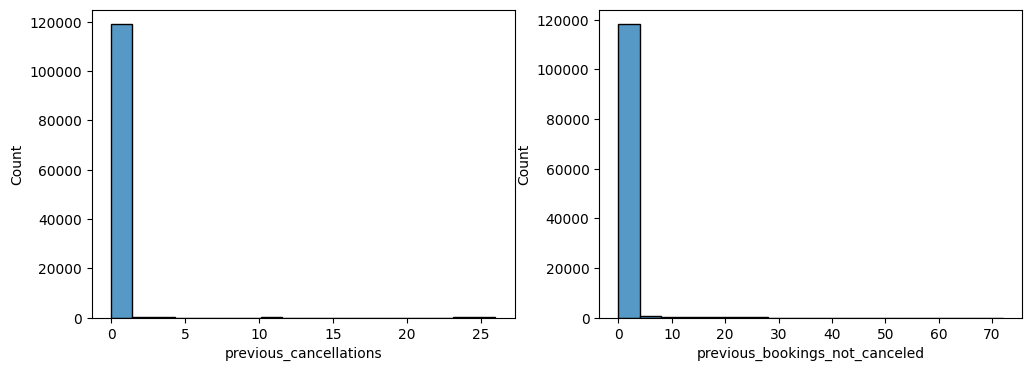

In [186]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(df['previous_cancellations'], ax=axes[0])
sns.histplot(df['previous_bookings_not_canceled'], ax=axes[1])

- Total guests (Adults + Children + Babies)

<Axes: xlabel='total_guests', ylabel='Count'>

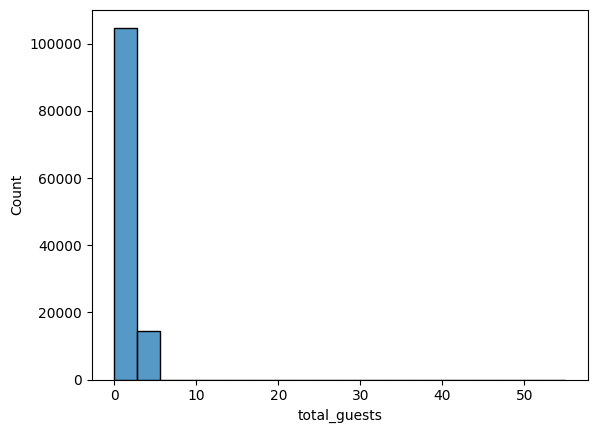

In [187]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
sns.histplot(df['total_guests'], bins=20)

- Heatmap korelasi

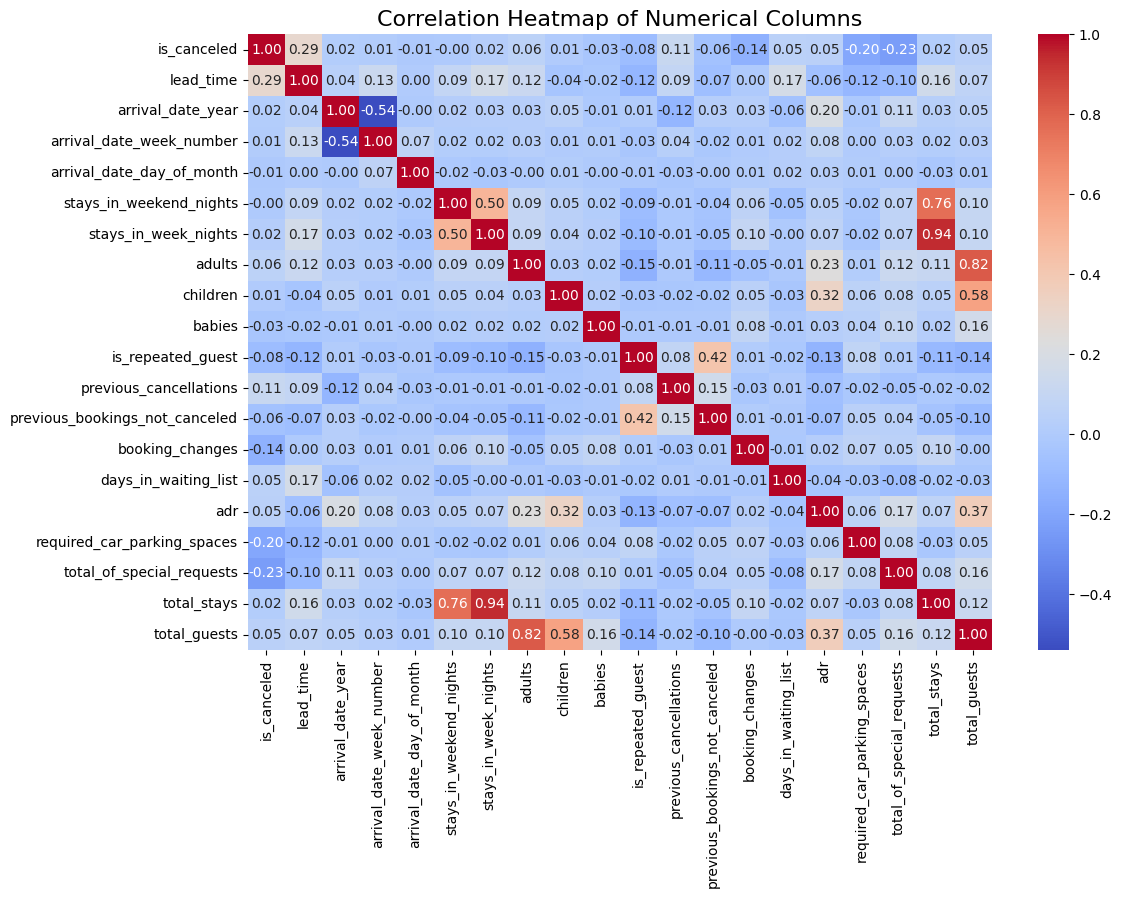

In [188]:
numeric_df = df.select_dtypes(include=['int64','float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns", fontsize=16)
plt.show()

- ADR tiap bulan

C:\Users\rizan\AppData\Local\Temp\ipykernel_41656\1781506366.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_adr = df.groupby('arrival_date_month')['adr'].mean().reset_index()


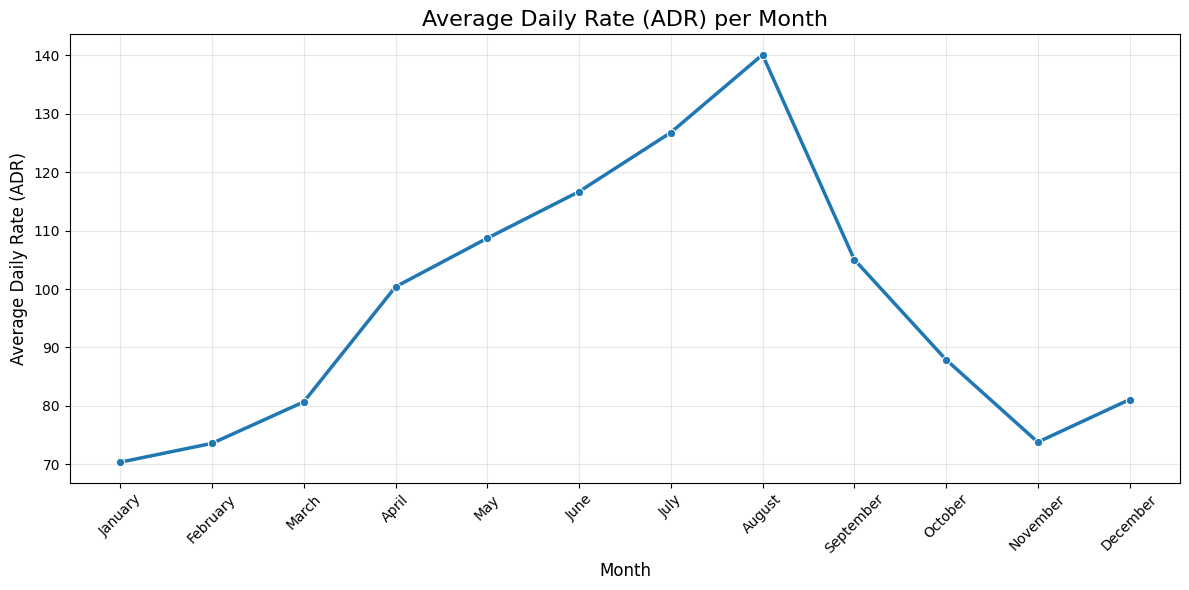

In [189]:
months_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=months_order, ordered=True)

monthly_adr = df.groupby('arrival_date_month')['adr'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', data=monthly_adr, marker='o', linewidth=2.5)
plt.title("Average Daily Rate (ADR) per Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Daily Rate (ADR)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)  # Tambah grid biar lebih mudah dibaca
plt.tight_layout()  # Biar label ga kepotong
plt.show()

- Cancellation Rate by Categories

<Axes: title={'center': 'Cancellation Rate by Customer Type (%)'}, xlabel='customer_type'>

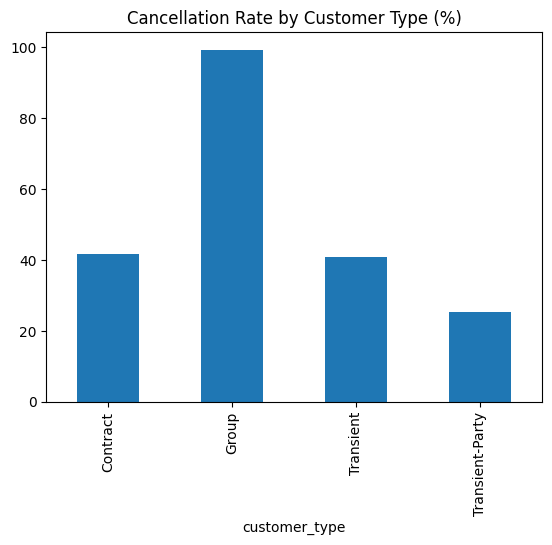

In [190]:
# Cancellation rate by hotel type
cancel_by_hotel = df.groupby('hotel')['is_canceled'].mean() * 100
cancel_by_hotel.plot(kind='bar', title='Cancellation Rate by Hotel Type (%)')

# Cancellation rate by deposit type
cancel_by_deposit = df.groupby('deposit_type')['is_canceled'].mean() * 100
cancel_by_deposit.plot(kind='bar', title='Cancellation Rate by Deposit Type (%)')

# Cancellation rate by customer type
cancel_by_customer = df.groupby('customer_type')['is_canceled'].mean() * 100
cancel_by_customer.plot(kind='bar', title='Cancellation Rate by Customer Type (%)')

## Feature Engineering

- Total Nights (Weekend + Weekday) = Durasi menginap mungkin memengaruhi keputusan

In [191]:
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_stays']

0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: total_stays, Length: 119390, dtype: int64

- Total Guests = Jumlah tamu menginap mungkin memengaruhi keputusan

In [192]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_guests']

0         2.0
1         2.0
2         1.0
3         1.0
4         2.0
         ... 
119385    2.0
119386    3.0
119387    2.0
119388    2.0
119389    2.0
Name: total_guests, Length: 119390, dtype: float64

- Agent/company = Booking lewat agen/company mungkin memengaruhi keputusan

In [193]:
df['has_agent'] = (df['agent'] != 0).astype(int)
df['has_company'] = (df['company'] != 0).astype(int)

- Room Assigned Different = Kamar yang tidak sesuai mungkin memengaruhi keputusan

In [194]:
df['room_assigned_different'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)

- Arrival Month = Pola musiman

In [195]:
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['arrival_month_num'] = df['arrival_date_month'].map(month_map)

- Lead time

In [196]:
df['lead_time_category'] = pd.cut(df['lead_time'], 
                                  bins=[0, 7, 30, 90, 180, 365, 1000],
                                  labels=['last_minute', 'short', 'medium', 'long', 'very_long', 'extreme'],
                                  include_lowest=True)

In [197]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,total_stays,total_guests,has_agent,has_company,room_assigned_different,arrival_month_num,lead_time_category
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,0,2.0,1,1,0,7,very_long
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,0,2.0,1,1,0,7,extreme
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,1,1.0,1,1,1,7,last_minute
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,1,1.0,1,1,0,7,short
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1,Check-Out,2015-07-03,2,2.0,1,1,0,7,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,Check-Out,2017-09-06,7,2.0,1,1,0,8,short
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,2,Check-Out,2017-09-07,7,3.0,1,1,0,8,long
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,4,Check-Out,2017-09-07,7,2.0,1,1,0,8,medium
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,Check-Out,2017-09-07,7,2.0,1,1,0,8,long


In [198]:
# Cek berapa banyak NaN
print(df['lead_time_category'].isnull().sum())

# Cek range lead_time
print(df['lead_time'].describe())

0
count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64


## Data Preprocessing

In [199]:
cols_to_drop = [
    # Redundant dengan fitur engineering
    'agent',                        # Sudah jadi has_agent
    'company',                      # Sudah jadi has_company
    'stays_in_weekend_nights',      # Sudah jadi total_stays
    'stays_in_week_nights',         # Sudah jadi total_stays
    'adults',                       # Sudah jadi total_guests
    'children',                     # Sudah jadi total_guests
    'babies',                       # Sudah jadi total_guests
    
    # Target leakage 
    'reservation_status',           
    'reservation_status_date',      
    
    # Redundant
    'arrival_date_year',            # Kurang penting untuk prediksi
    'arrival_date_week_number',     # Redundant dengan month
    'arrival_date_day_of_month',    # Kurang penting
    'arrival_date_month',           # Sudah ada arrival_month_num
    
    # High cardinality
    'country'
]

# Drop kolom
df_clean = df.drop(cols_to_drop, axis=1)

print(f"Shape before drop: {df.shape}")
print(f"Shape after drop: {df_clean.shape}")
print(f"\nRemaining columns: {df_clean.columns.tolist()}")

Shape before drop: (119390, 39)
Shape after drop: (119390, 25)

Remaining columns: ['hotel', 'is_canceled', 'lead_time', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_stays', 'total_guests', 'has_agent', 'has_company', 'room_assigned_different', 'arrival_month_num', 'lead_time_category']


In [200]:
# Cek info
print(df_clean.info())

# Cek missing values
print("\nMissing values:")
print(df_clean.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119390 non-null  object  
 1   is_canceled                     119390 non-null  int64   
 2   lead_time                       119390 non-null  int64   
 3   meal                            119390 non-null  object  
 4   market_segment                  119390 non-null  object  
 5   distribution_channel            119390 non-null  object  
 6   is_repeated_guest               119390 non-null  int64   
 7   previous_cancellations          119390 non-null  int64   
 8   previous_bookings_not_canceled  119390 non-null  int64   
 9   reserved_room_type              119390 non-null  object  
 10  assigned_room_type              119390 non-null  object  
 11  booking_changes                 119390 non-null  int64   
 12  de

In [201]:
# Categorical columns
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

# Numerical columns (kecuali target)
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'is_canceled' in numerical_cols:
    numerical_cols.remove('is_canceled')  # Hapus target dari list

print(f"Categorical columns ({len(categorical_cols)}):")
print(categorical_cols)

print(f"\nNumerical columns ({len(numerical_cols)}):")
print(numerical_cols)

Categorical columns (10):
['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'arrival_month_num', 'lead_time_category']

Numerical columns (11):
['lead_time', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_stays', 'total_guests']


In [202]:
X = df_clean.drop(columns=['is_canceled'])
y = df_clean['is_canceled']

In [203]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    stratify=y, 
    test_size=0.2, 
    random_state=42
)

**Pipeline 1**

In [204]:
pipeline_tree = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), 
         categorical_cols),
    ], remainder='passthrough'))
])

**Pipeline 2**

In [205]:
pipeline_scaled = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), 
         categorical_cols),
        ('scaler', StandardScaler(), numerical_cols)
    ], remainder='passthrough'))
])

### Fit & Transform

In [206]:
X_train_tree = pipeline_tree.fit_transform(X_train)
X_test_tree = pipeline_tree.transform(X_test)

X_train_scaled = pipeline_scaled.fit_transform(X_train)
X_test_scaled = pipeline_scaled.transform(X_test)

print(f"X_train_tree shape: {X_train_tree.shape}")
print(f"X_train_scaled shape: {X_train_scaled.shape}")

X_train_tree shape: (95512, 71)
X_train_scaled shape: (95512, 71)


In [207]:
# Pipeline Tree (No Scaler)
X_train_tree_df = pd.DataFrame(
    X_train_tree,
    columns=pipeline_tree.named_steps['preprocessor'].get_feature_names_out()
)

print("X_train_tree (Pipeline Tanpa Scaler)")
print(f"Shape: {X_train_tree_df.shape}")
print(f"\nColumns: {X_train_tree_df.columns.tolist()}")
print(f"\nFirst 5 rows:")
print(X_train_tree_df.head())

# Pipeline Scaled (With Scaler)
X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=pipeline_scaled.named_steps['preprocessor'].get_feature_names_out()
)

print("PREVIEW: X_train_scaled (Pipeline Dengan Scaler)")
print(f"Shape: {X_train_scaled_df.shape}")
print(f"\nFirst 5 rows:")
print(X_train_scaled_df.head())

X_train_tree (Pipeline Tanpa Scaler)
Shape: (95512, 71)

Columns: ['onehot__hotel_Resort Hotel', 'onehot__meal_FB', 'onehot__meal_HB', 'onehot__meal_SC', 'onehot__meal_Undefined', 'onehot__market_segment_Complementary', 'onehot__market_segment_Corporate', 'onehot__market_segment_Direct', 'onehot__market_segment_Groups', 'onehot__market_segment_Offline TA/TO', 'onehot__market_segment_Online TA', 'onehot__market_segment_Undefined', 'onehot__distribution_channel_Direct', 'onehot__distribution_channel_GDS', 'onehot__distribution_channel_TA/TO', 'onehot__distribution_channel_Undefined', 'onehot__reserved_room_type_B', 'onehot__reserved_room_type_C', 'onehot__reserved_room_type_D', 'onehot__reserved_room_type_E', 'onehot__reserved_room_type_F', 'onehot__reserved_room_type_G', 'onehot__reserved_room_type_H', 'onehot__reserved_room_type_L', 'onehot__reserved_room_type_P', 'onehot__assigned_room_type_B', 'onehot__assigned_room_type_C', 'onehot__assigned_room_type_D', 'onehot__assigned_room_type

## Modelling

### Cost Analysis Function

In [208]:
def hotel_cost_analysis(y_true, y_pred, 
                        adr_avg,
                        nights_avg,
                        remarketing_cost=20,
                        fp_cost_factor=0.3):
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Tanpa model
    revenue_loss_no_model = (fn + tp) * adr_avg * nights_avg
    
    # Dengan model
    remarketing_total = (tp + fp) * remarketing_cost
    fp_loss = fp * adr_avg * nights_avg * fp_cost_factor
    fn_loss = fn * adr_avg * nights_avg
    
    total_cost_with_model = remarketing_total + fp_loss + fn_loss
    penghematan = revenue_loss_no_model - total_cost_with_model
    
    return {
        'TN (Aman)': tn,
        'FP (Salah Prediksi)': fp,
        'FN (Kamar Kosong)': fn,
        'TP (Kamar Diselamatkan)': tp,
        'Recall (%)': (tp / (tp + fn)) * 100 if (tp + fn) > 0 else 0,
        'Precision (%)': (tp / (tp + fp)) * 100 if (tp + fp) > 0 else 0,
        'Tanpa Model - Loss ($)': revenue_loss_no_model,
        'Dengan Model - Cost ($)': total_cost_with_model,
        'Penghematan ($)': penghematan,
        'ROI (%)': (penghematan / total_cost_with_model) * 100 if total_cost_with_model > 0 else 0,
    }

In [212]:
adr_avg = df['adr'].mean()
nights_avg = df['stays_in_week_nights'].mean() + df['stays_in_weekend_nights'].mean()

cost_result = hotel_cost_analysis(
    y_test,
    y_pred_baseline,
    adr_avg=adr_avg,
    nights_avg=nights_avg
)

- TP: Kamar yang berhasil diselamatkan dari cancel
- FN: Kamar kosong karena tidak terdeteksi (RUGI BESAR!)
- FP: Salah prediksi cancel, ternyata aman
- Penghematan: Keuntungan vs tidak pakai model

### Define Models

In [216]:
# Dictionary models dengan pipeline yang sesuai
models = {
    
    # TREE-BASED MODELS
    'Random Forest': {
        'model': RandomForestClassifier(
            n_estimators=200,
            max_depth=10,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        ),
        'use_scaled': False
    },
    
    'XGBoost': {
        'model': XGBClassifier(
            n_estimators=200,
            max_depth=6,
            learning_rate=0.1,
            scale_pos_weight=3,
            eval_metric='logloss',
            random_state=42,
            n_jobs=-1
        ),
        'use_scaled': False
    },
    
    'LightGBM': {
        'model': LGBMClassifier(
            n_estimators=200,
            max_depth=6,
            learning_rate=0.1,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        ),
        'use_scaled': False
    },
    
    # LINEAR MODEL    
    'Logistic Regression': {
        'model': LogisticRegression(
            class_weight='balanced',
            max_iter=1000,
            solver='lbfgs',
            random_state=42
        ),
        'use_scaled': True
    }
}

print("\nModel yang akan diuji:")
for name, config in models.items():
    pipeline = "Scaled (StandardScaler)" if config['use_scaled'] else "Tree (tanpa scaler)"
    print(f"  - {name}: {pipeline}")


Model yang akan diuji:
  - Random Forest: Tree (tanpa scaler)
  - XGBoost: Tree (tanpa scaler)
  - LightGBM: Tree (tanpa scaler)
  - Logistic Regression: Scaled (StandardScaler)


### Train & Evaluation

In [217]:
results = []

adr_avg = df['adr'].mean()
nights_avg = (
    df['stays_in_week_nights'].mean() + 
    df['stays_in_weekend_nights'].mean()
)

for name, config in models.items():
    model = config['model']
    use_scaled = config['use_scaled']
    
    # Pilih data yang sesuai
    if use_scaled:
        X_tr = X_train_scaled
        X_te = X_test_scaled
        pipeline_name = "Scaled"
    else:
        X_tr = X_train_tree
        X_te = X_test_tree
        pipeline_name = "Tree"
    
    print(f"\nTraining {name} ({pipeline_name})...")
    
    # Training
    model.fit(X_tr, y_train)
    
    # Predict
    y_pred = model.predict(X_te)
    y_proba = model.predict_proba(X_te)[:, 1]
    
    # Metrik ML
    auc = roc_auc_score(y_test, y_proba)
    
    # Cost analysis (FIXED)
    cost = hotel_cost_analysis(
        y_test,
        y_pred,
        adr_avg=adr_avg,
        nights_avg=nights_avg
    )
    
    # Simpan hasil
    result = {
        'Model': name,
        'Pipeline': pipeline_name,
        'ROC-AUC': round(auc, 4),
        'Recall (%)': cost['Recall (%)'],
        'Precision (%)': cost['Precision (%)'],
        'TP (Kamar Diselamatkan)': cost['TP (Kamar Diselamatkan)'],
        'FN (Kamar Kosong)': cost['FN (Kamar Kosong)'],
        'FP (Salah Prediksi)': cost['FP (Salah Prediksi)'],
        'Penghematan ($)': cost['Penghematan ($)'],
        'ROI (%)': cost['ROI (%)'],
    }
    
    results.append(result)
    
    print(f"  Done! Recall: {cost['Recall (%)']:.2f}%, ROI: {cost['ROI (%)']:.2f}%")


Training Random Forest (Tree)...
  Done! Recall: 72.79%, ROI: 151.50%

Training XGBoost (Tree)...
  Done! Recall: 89.07%, ROI: 204.50%

Training LightGBM (Tree)...
[LightGBM] [Info] Number of positive: 35379, number of negative: 60133
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 95512, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

c:\Users\rizan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\rizan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


  Done! Recall: 75.36%, ROI: 145.33%


### Benchmark Rank

In [218]:
# Buat DataFrame
df_results = pd.DataFrame(results)

print("HASIL BENCHMARK")
print(df_results.round(2).to_string(index=False))

# Ranking by Penghematan
print("\nRANKING BY PENGHEMATAN ($) - HIGHEST IS BEST")
df_ranking = df_results.sort_values('Penghematan ($)', ascending=False)
print(df_ranking[['Model', 'Recall (%)', 'Penghematan ($)', 'ROI (%)']].to_string(index=False))

# Ranking by Recall (minimize kamar kosong)
print("\nRANKING BY RECALL (%) - HIGHEST IS BEST")
df_recall = df_results.sort_values('Recall (%)', ascending=False)
print(df_recall[['Model', 'Recall (%)', 'FN (Kamar Kosong)', 'Penghematan ($)']].to_string(index=False))

# Best model overall
best_model = df_ranking.iloc[0]['Model']
best_penghematan = df_ranking.iloc[0]['Penghematan ($)']
best_recall = df_ranking.iloc[0]['Recall (%)']

print(f"\nModel Terbaik: {best_model}")
print(f"Recall: {best_recall:.2f}% (Kamar cancel yang berhasil dideteksi)")
print(f"Penghematan: ${best_penghematan:,.0f}")
print(f"ROI: {df_ranking.iloc[0]['ROI (%)']:.1f}%")

HASIL BENCHMARK
              Model Pipeline  ROC-AUC  Recall (%)  Precision (%)  TP (Kamar Diselamatkan)  FN (Kamar Kosong)  FP (Salah Prediksi)  Penghematan ($)  ROI (%)
      Random Forest     Tree     0.89       72.79          75.63                     6438               2407                 2074       1859863.38   151.50
            XGBoost     Tree     0.91       89.07          65.44                     7878                967                 4160       2073553.66   204.50
           LightGBM     Tree     0.91       78.89          76.66                     6978               1867                 2124       2031323.51   192.33
Logistic Regression   Scaled     0.87       75.36          69.52                     6666               2179                 2923       1829003.29   145.33

RANKING BY PENGHEMATAN ($) - HIGHEST IS BEST
              Model  Recall (%)  Penghematan ($)    ROI (%)
            XGBoost   89.067270     2.073554e+06 204.503923
           LightGBM   78.892029     2.

In [219]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# PIPELINE BASELINE XGB
pipeline_xgb = Pipeline([
    ('preprocessor', pipeline_tree.named_steps['preprocessor']),
    ('classifier', XGBClassifier(
        scale_pos_weight=3,
        max_depth=6,
        learning_rate=0.1,
        n_estimators=200,
        random_state=42,
        eval_metric='logloss',
        n_jobs=-1
    ))
])

# Train
pipeline_xgb.fit(X_train, y_train)

# Predict
y_pred_baseline = pipeline_xgb.predict(X_test)
y_proba_baseline = pipeline_xgb.predict_proba(X_test)[:, 1]

# EVALUATION
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_baseline))

roc_auc = roc_auc_score(y_test, y_proba_baseline)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# COST ANALYSIS
adr_avg = df['adr'].mean()
nights_avg = (
    df['stays_in_week_nights'].mean() +
    df['stays_in_weekend_nights'].mean()
)

cost_baseline = hotel_cost_analysis(
    y_test,
    y_pred_baseline,
    adr_avg=adr_avg,
    nights_avg=nights_avg
)

print("\nCost Analysis:")
for key, value in cost_baseline.items():
    if '$' in key:
        print(f"  {key}: ${value:,.2f}")
    elif '%' in key:
        print(f"  {key}: {value}%")
    else:
        print(f"  {key}: {value}")


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81     15033
           1       0.65      0.89      0.75      8845

    accuracy                           0.79     23878
   macro avg       0.79      0.81      0.78     23878
weighted avg       0.82      0.79      0.79     23878


Confusion Matrix:
[[10873  4160]
 [  967  7878]]

ROC-AUC Score: 0.9114

Cost Analysis:
  TN (Aman): 10873
  FP (Salah Prediksi): 4160
  FN (Kamar Kosong): 967
  TP (Kamar Diselamatkan): 7878
  Recall (%): 89.06726964386658%
  Precision (%): 65.44276457883369%
  Tanpa Model - Loss ($): $3,087,496.89
  Dengan Model - Cost ($): $1,013,943.22
  Penghematan ($): $2,073,553.66
  ROI (%): 204.50392269961534%


## Hyperparameter Tuning

In [220]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'classifier__n_estimators': [200, 300, 400, 500],
    'classifier__max_depth': [4, 6, 8],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.15],
    'classifier__scale_pos_weight': [2, 3, 4],
    'classifier__subsample': [0.7, 0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__gamma': [0, 0.1, 0.2],
    'classifier__reg_lambda': [1, 5, 10]
}

random_search = RandomizedSearchCV(
    estimator=pipeline_xgb, 
    param_distributions=param_distributions,
    n_iter=100,                
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

print(f"\nBest CV Recall: {random_search.best_score_:.4f}")
print("\nBest Parameters:")
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best CV Recall: 0.9388

Best Parameters:
  classifier__subsample: 1.0
  classifier__scale_pos_weight: 4
  classifier__reg_lambda: 10
  classifier__n_estimators: 200
  classifier__min_child_weight: 3
  classifier__max_depth: 6
  classifier__learning_rate: 0.01
  classifier__gamma: 0.2
  classifier__colsample_bytree: 0.8


### Evaluate on Test

In [227]:
# Best tuned model
xgb_best = random_search.best_estimator_

# Predict
y_pred_tuned = xgb_best.predict(X_test)
y_proba_tuned = xgb_best.predict_proba(X_test)[:, 1]

print("\nClassification Report (TUNED):")
print(classification_report(y_test, y_pred_tuned))

print("\nConfusion Matrix (TUNED):")
cm = confusion_matrix(y_test, y_pred_tuned)
print(cm)

tn, fp, fn, tp = cm.ravel()

print("\nBreakdown:")
print(f"  TN: {tn}")
print(f"  FP: {fp}")
print(f"  FN (KAMAR KOSONG): {fn}")
print(f"  TP: {tp}")

print(f"\nROC-AUC: {roc_auc_score(y_test, y_proba_tuned):.4f}")

cost_tuned = hotel_cost_analysis(
    y_test,
    y_pred_tuned,
    adr_avg=df['adr'].mean(),
    nights_avg=(
        df['stays_in_week_nights'].mean() +
        df['stays_in_weekend_nights'].mean()
    )
)


Classification Report (TUNED):
              precision    recall  f1-score   support

           0       0.94      0.54      0.69     15033
           1       0.55      0.94      0.69      8845

    accuracy                           0.69     23878
   macro avg       0.74      0.74      0.69     23878
weighted avg       0.80      0.69      0.69     23878


Confusion Matrix (TUNED):
[[8123 6910]
 [ 505 8340]]

Breakdown:
  TN: 8123
  FP: 6910
  FN (KAMAR KOSONG): 505
  TP: 8340

ROC-AUC: 0.8871


### Compare

In [232]:
# BASELINE (PIPELINE)
y_pred_baseline = pipeline_xgb.predict(X_test)
y_proba_baseline = pipeline_xgb.predict_proba(X_test)[:, 1]

cost_baseline = hotel_cost_analysis(
    y_test,
    y_pred_baseline,
    adr_avg=df['adr'].mean(),
    nights_avg=(
        df['stays_in_week_nights'].mean() +
        df['stays_in_weekend_nights'].mean()
    )
)

# TUNED (PIPELINE)
y_pred_tuned = xgb_best.predict(X_test)
y_proba_tuned = xgb_best.predict_proba(X_test)[:, 1]

cost_tuned = hotel_cost_analysis(
    y_test,
    y_pred_tuned,
    adr_avg=df['adr'].mean(),
    nights_avg=(
        df['stays_in_week_nights'].mean() +
        df['stays_in_weekend_nights'].mean()
    )
)

# COMPARISON TABLE
comparison = pd.DataFrame({
    'Metric': [
        'Recall (%)',
        'Precision (%)',
        'ROC-AUC',
        'FN (Kamar Kosong)',
        'TP (Kamar Diselamatkan)',
        'FP (False Alarm)',
        'Penghematan ($)',
        'ROI (%)'
    ],
    'Baseline': [
        cost_baseline['Recall (%)'],
        cost_baseline['Precision (%)'],
        roc_auc_score(y_test, y_proba_baseline),
        cost_baseline['FN (Kamar Kosong)'],
        cost_baseline['TP (Kamar Diselamatkan)'],
        cost_baseline['FP (Salah Prediksi)'],
        cost_baseline['Penghematan ($)'],
        cost_baseline['ROI (%)']
    ],
    'Tuned': [
        cost_tuned['Recall (%)'],
        cost_tuned['Precision (%)'],
        roc_auc_score(y_test, y_proba_tuned),
        cost_tuned['FN (Kamar Kosong)'],
        cost_tuned['TP (Kamar Diselamatkan)'],
        cost_tuned['FP (Salah Prediksi)'],
        cost_tuned['Penghematan ($)'],
        cost_tuned['ROI (%)']
    ]
})

# Improvement absolute
comparison['Improvement'] = comparison['Tuned'] - comparison['Baseline']

# Improvement percentage (safe division)
comparison['Improvement %'] = np.where(
    comparison['Baseline'] != 0,
    (comparison['Improvement'] / comparison['Baseline']) * 100,
    0
)

comparison['Baseline'] = comparison['Baseline'].round(2)
comparison['Tuned'] = comparison['Tuned'].round(2)
comparison['Improvement'] = comparison['Improvement'].round(2)
comparison['Improvement %'] = comparison['Improvement %'].round(2)

print("MODEL COMPARISON")
print(comparison.to_string(index=False))


MODEL COMPARISON
                 Metric   Baseline      Tuned  Improvement  Improvement %
             Recall (%)      89.07      94.29         5.22           5.86
          Precision (%)      65.44      54.69       -10.75         -16.43
                ROC-AUC       0.91       0.89        -0.02          -2.66
      FN (Kamar Kosong)     967.00     505.00      -462.00         -47.78
TP (Kamar Diselamatkan)    7878.00    8340.00       462.00           5.86
       FP (False Alarm)    4160.00    6910.00      2750.00          66.11
        Penghematan ($) 2073553.66 1882602.37   -190951.29          -9.21
                ROI (%)     204.50     156.25       -48.26         -23.60


## Feature Importances

In [236]:
# Ambil preprocessor & classifier
preprocessor = pipeline_xgb.named_steps['preprocessor']
model = pipeline_xgb.named_steps['classifier']

# Ambil feature names setelah preprocessing
feature_names = preprocessor.get_feature_names_out()

# Ambil importance dari XGBoost
importances = model.feature_importances_

# Buat dataframe
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp.head(10))

                                   Feature  Importance
36         onehot__deposit_type_Non Refund    0.478076
64  remainder__required_car_parking_spaces    0.090055
70      remainder__room_assigned_different    0.087341
59       remainder__previous_cancellations    0.045013
10        onehot__market_segment_Online TA    0.043552
65    remainder__total_of_special_requests    0.025139
52  onehot__lead_time_category_last_minute    0.018768
39         onehot__customer_type_Transient    0.015887
40   onehot__customer_type_Transient-Party    0.010723
9     onehot__market_segment_Offline TA/TO    0.010162


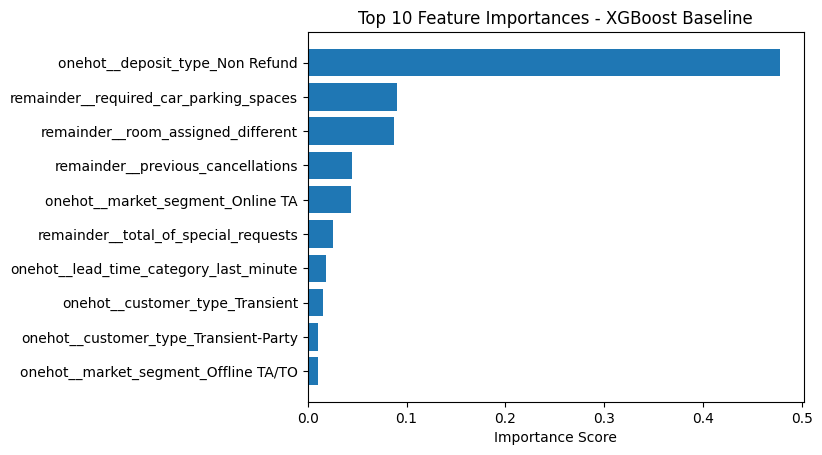

In [238]:
import matplotlib.pyplot as plt

top10 = feat_imp.head(10)

plt.figure()
plt.barh(top10['Feature'], top10['Importance'])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances - XGBoost Baseline")
plt.xlabel("Importance Score")
plt.show()

Fitur paling penting yang memengaruhi model adalah `deposit_type_Non Refund`, disusul dengan `required_car_parking_spaces`, dan `room_assigned_diffrent`

## Conclusion

Berdasarkan hasil evaluasi model Baseline, kita dapat menyimpulkan bahwa apabila hotel menggunakan model ini untuk mendeteksi tamu yang berisiko melakukan pembatalan, maka model mampu memberikan dampak finansial yang signifikan.

Model memiliki:

- Recall = 89.07%
- Precision = 65.44%
- ROI = 204.5%
- Penghematan ≈ $2.07 juta

Simulasi Bisnis

Misalkan dalam satu periode terdapat:

- 10.000 booking
- 4.000 benar-benar cancel
- 6.000 tidak cancel

1. Tanpa Model
- Semua 4.000 booking cancel menjadi kamar kosong
- Hotel kehilangan seluruh potensi revenue dari booking tersebut
- Tidak ada mekanisme mitigasi
- Tidak ada optimasi overbooking
- Tidak ada early intervention
Hotel akan sepenuhnya reaktif.

2. Dengan Model (Baseline)

Dengan recall 89%:
- 3.560 booking cancel berhasil terdeteksi lebih awal
- Hanya 440 booking yang lolos dan tetap menjadi kamar kosong

Artinya: **Model secara signifikan mengurangi potensi kamar kosong.**

Dari hasil evaluasi aktual:

- FN (kamar kosong yang tidak terdeteksi) = 967
- TP (kamar yang berhasil diselamatkan) = 7.878
- FP (false alarm) = 4.160

Namun secara finansial:

- Total penghematan = $2.073.553
- ROI = 204%

Artinya: **Setiap $1 biaya intervensi menghasilkan sekitar $2 keuntungan.**

Ini menunjukkan bahwa meskipun ada false alarm, secara agregat model tetap sangat menguntungkan.

## Business Recommendations

Berdasarkan hasil evaluasi model baseline, model prediksi pembatalan ini dapat digunakan sebagai alat bantu pengambilan keputusan dalam manajemen reservasi hotel. Berikut rekomendasi bisnis yang dapat diterapkan:

1. **Terapkan Risk-Based Booking Strategy**

Gunakan probabilitas hasil model untuk mengelompokkan booking menjadi risiko rendah dan tinggi.
Booking berisiko tinggi dapat dimonitor atau ditindaklanjuti lebih awal untuk mengurangi potensi kamar kosong.

2. **Lakukan Intervensi Terarah**

Untuk booking dengan risiko tinggi, hotel dapat:
- Mengirim reminder atau konfirmasi ulang
- Memperkuat kebijakan deposit
- Menerapkan strategi overbooking yang lebih terkontrol
- Hal ini membantu mencegah kehilangan revenue akibat pembatalan mendadak.

3. **Optimalkan Revenue Management**

Model memungkinkan hotel mengambil keputusan berbasis data, bukan asumsi historis semata.
Dengan deteksi dini pembatalan, hotel dapat:

- Mengurangi kamar kosong
- Meningkatkan occupancy rate
- Memaksimalkan pendapatan

Implementasi model ini membantu hotel beralih dari sistem reaktif menjadi proaktif dalam mengelola risiko pembatalan, sehingga dapat meningkatkan efisiensi operasional dan profitabilitas secara keseluruhan.

## Streamlit

In [239]:
import joblib

joblib.dump(pipeline_xgb, "hotel_cancellation_model.pkl")

['hotel_cancellation_model.pkl']

In [240]:
loaded_model = joblib.load("hotel_cancellation_model.pkl")

sample_pred = loaded_model.predict(X_test.iloc[:5])
print("Test Load Success:", sample_pred)

Test Load Success: [0 0 1 0 0]
